# **Widening Participation in Higher Education 2021/22 Academic Year**

#### *In this project, I will carry out my own Data Analysis and estimates of this Dataset to compare it later with the official Headline facts and figures published by the DfE on progression to higher education (HE) by age 19 for state-funded pupils by personal characteristics and for A level and equivalent students, by school or college type, who progressed to HE by age 19, with breakdowns for high tariff higher education providers.*

# **Hypothesis/Contents**

#### 1. The gap in progression rates between FSM eligible pupils and non-FSM eligible pupils keeps increasing since the time_period 201920. 
#### 2. There are more female pupils progressing to HE.
#### 3. Black Caribbean pupils were amongst the least likely to progress to high tariff HE.
#### 4. Male White British Pupils were amongst the least likely to progress to HE.
#### 5. A level students received Centre Assessed Grades in 2019/20, with students more likely to achieve higher grades than in previous years. This led to more students being accepted to HE and in particular to high tariff HE which may explain the increased progression rates compared with last year.  
#### 6. Pupils with an Asian background are very likely to progress to HE.
#### 7. POLAR (Participation of Local Areas) Pupils in the most advantaged quintile were almost twice as likely to progress to HE by age 19 by 2021/22 as those from the most disadvantaged quintile, at 61.8% compared to 31.7%.
#### 8. SEM
#### 9. Correlation
#### 10. Combined Characteristics
#### 11. Attempt of Forecast for 2025



In [1]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations
df = pd.read_csv('progress_to_HE.csv')

In [2]:
df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,characteristic,characteristic_detail,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students
0,200910,Academic year,National,E92000001,England,FSM Status,Free School Meals,18.6,2.0,14664,1537,78802
1,200910,Academic year,National,E92000001,England,FSM Status,All Other Pupils,36.2,9.4,187028,48529,516955
2,200910,Academic year,National,E92000001,England,SEN Status,SEN Support,11.2,1.3,9505,1086,84851
3,200910,Academic year,National,E92000001,England,SEN Status,SEN with statement/EHCP,5.5,0.7,1348,178,24456
4,200910,Academic year,National,E92000001,England,SEN Status,No Identified SEN,39.2,10.0,190839,48802,486450


In [3]:
#Due to our source (gov.uk), the dataset should be clean enough. Let's see the general overwiew:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time_period                        630 non-null    int64  
 1   time_identifier                    630 non-null    object 
 2   geographic_level                   630 non-null    object 
 3   country_code                       630 non-null    object 
 4   country_name                       630 non-null    object 
 5   characteristic                     630 non-null    object 
 6   characteristic_detail              630 non-null    object 
 7   progression_rate                   630 non-null    float64
 8   high_tariff_progression_rate       630 non-null    float64
 9   number_of_he_students              630 non-null    int64  
 10  number_of_high_tariff_he_students  630 non-null    int64  
 11  number_of_students                 630 non-null    int64  

In [4]:
#Let's take a look at the numeric columns
df.describe()

,time_period,progression_rate,high_tariff_progression_rate,number_of_he_students,number_of_high_tariff_he_students,number_of_students
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,201528.504762,42.144921,10.566190,47770.139683,12082.620635,119325.580952
std,376.409769,17.404611,7.312879,72321.413850,19143.246749,175147.690330
min,200910.000000,2.300000,0.000000,5.000000,0.000000,111.000000
25%,201213.000000,33.425000,5.900000,1940.000000,519.500000,5517.000000
50%,201516.000000,43.600000,10.000000,9473.500000,1828.000000,19305.000000
75%,201819.000000,52.500000,12.800000,50924.250000,12521.500000,118965.500000
max,202122.000000,83.800000,46.000000,244590.000000,70390.000000,599140.000000


In [5]:
#Let's make sure we know all the characteristic listed in the table.
unique_characteristic = df['characteristic'].unique()
print(unique_characteristic) 

['FSM Status' 'SEN Status' 'First Language' 'Gender' 'Ethnicity Minor'
 'POLAR' 'Looked After Status' 'SEN Major' 'Ethnicity Major'
 'Disadvantage' 'Children in Need']


In [6]:
#Let's make sure we know all the characteristic details listed in the table.
unique_characteristic_details = df['characteristic_detail'].unique()
print(unique_characteristic_details) 

['Free School Meals' 'All Other Pupils' 'SEN Support'
 'SEN with statement/EHCP' 'No Identified SEN' 'English'
 'Other than English' 'Unclassified' 'Female' 'Male' 'White - British'
 'White - Irish' 'Traveller of Irish Heritage' 'Gypsy / Roma'
 'Any Other White Background' 'White and Black Caribbean'
 'White and Black African' 'White and Asian' 'Any Other Mixed Background'
 'Indian' 'Pakistani' 'Bangladeshi' 'Any Other Asian Background'
 'Black Caribbean' 'Black - African' 'Any Other Black Background'
 'Chinese' 'Any Other Ethnic Group' 'Unknown' 'Q1 - Most Disadvantaged'
 'Q2' 'Q3' 'Q4' 'Q5 - Most Advantaged'
 'Looked after continuously for 12 months or more' 'All SEN' 'White'
 'Mixed' 'Asian' 'Black' 'Disadvantaged' 'Children in Need']


## 1. Has the gap in progression rates between FSM eligible pupils and non-FSM eligible pupils increased since Academic Year 2019-20?

In [7]:
#We filter the data for 'FSM' and 'All Other Pupils'
fsm_data = df[df['characteristic_detail'] == 'Free School Meals']
non_fsm_data = df[df['characteristic_detail'] == 'All Other Pupils']

 # Mean progression rates for FSM and non-FSM groups for 201920
fsm_progression_rate_201920 = fsm_data[fsm_data['time_period'] == 201920]['progression_rate'].mean()
non_fsm_progression_rate_201920 = non_fsm_data[non_fsm_data['time_period'] == 201920]['progression_rate'].mean()

# Mean progression rates for FSM and non-FSM groups for 202122
fsm_progression_rate_202122 = fsm_data[fsm_data['time_period'] == 202122]['progression_rate'].mean()
non_fsm_progression_rate_202122 = non_fsm_data[non_fsm_data['time_period'] == 202122]['progression_rate'].mean()

# Gap in progression rates between FSM and non-FSM eligible pupils for 201920
progression_rate_gap_201920 = non_fsm_progression_rate_201920 - fsm_progression_rate_201920

# Gap in progression rates between FSM and non-FSM eligible pupils for 202122
progression_rate_gap_202122 = non_fsm_progression_rate_202122 - fsm_progression_rate_202122

# Gap in progression rates between 201920 and 202122
if progression_rate_gap_202122 > progression_rate_gap_201920:
    print("The gap in progression rates between FSM eligible and non-FSM eligible pupils has increased since time period 2019-20.")
    print(f"The increase in gap is: {progression_rate_gap_202122 - progression_rate_gap_201920:.2f}")
elif progression_rate_gap_202122 < progression_rate_gap_201920:
    print("The gap in progression rates between FSM eligible and non-FSM eligible pupils has decreased since time period 2019-20.")
    print(f"The decrease in gap is: {progression_rate_gap_201920 - progression_rate_gap_202122:.2f}")
else:
    print("The gap in progression rates between FSM eligible and non-FSM eligible pupils has remained unchanged since time period 2019-20.")


The gap in progression rates between FSM eligible and non-FSM eligible pupils has increased since time period 2019-20.
The increase in gap is: 1.15


### *We now know for a fact that the gap between FSM and non-FSM pupils kept increasing between the academic years 2019-20 and 2021-22.* 

## 2. Was female's progression to HE higher than male's for Academic Year 2021-22?

Female progression rate is higher than Male.


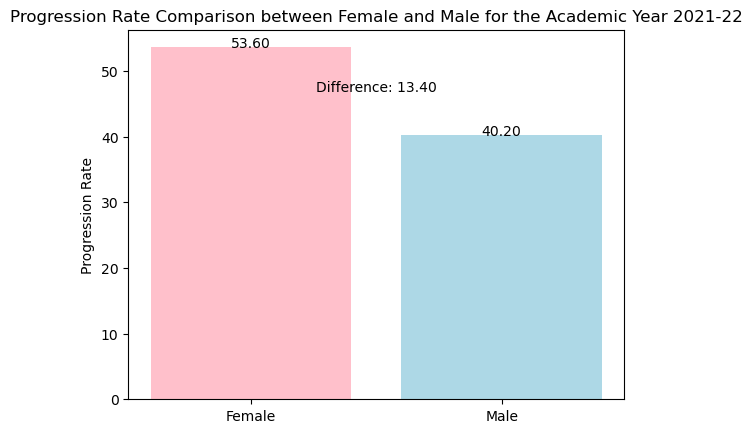

In [8]:
# Filter data for '202122' time_period
df_filtered = df[df['time_period'] == 202122]

# Filter data for 'Female' and 'Male' characteristic_detail
female_data = df_filtered[df_filtered['characteristic_detail'] == 'Female']
male_data = df_filtered[df_filtered['characteristic_detail'] == 'Male']

# Calculate mean progression rate for Female and Male
female_progression_rate = female_data['progression_rate'].mean()
male_progression_rate = male_data['progression_rate'].mean()

# Check if Female progression_rate is higher than Male
if female_progression_rate > male_progression_rate:
    print("Female progression rate is higher than Male.")

    # Plotting
    plt.bar(['Female', 'Male'], [female_progression_rate, male_progression_rate], color=['pink', 'lightblue'])
    
    # Annotate bars with exact numbers
    plt.text(0, female_progression_rate + 0.01, f"{female_progression_rate:.2f}", ha='center')
    plt.text(1, male_progression_rate + 0.01, f"{male_progression_rate:.2f}", ha='center')
    
    # Calculate and annotate difference between Female and Male
    difference = female_progression_rate - male_progression_rate
    plt.text(0.5, (female_progression_rate + male_progression_rate) / 2 + 0.01, f"Difference: {difference:.2f}", ha='center')

    plt.title('Progression Rate Comparison between Female and Male for the Academic Year 2021-22')
    plt.ylabel('Progression Rate')
    plt.show()
else:
    print("Female progression rate is not higher than Male.")

### *We can see that female's progression to HE (53.6) is higher than male's progression (40.2) in 13.40 points* 

## 3. Were Black Caribbean Pupils amongst the least likely to access High Tariff Higher Education? 

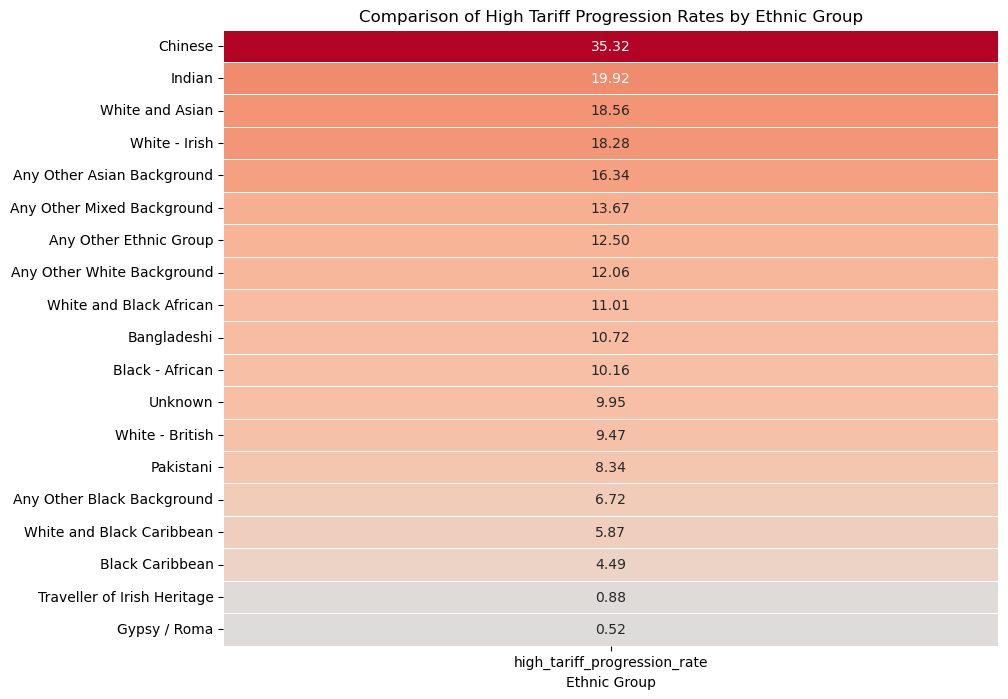

In [9]:
# Filter data for 'Black Caribbean' characteristic_detail
black_caribbean_data = df[df['characteristic_detail'] == 'Black Caribbean']

# Filter data for other ethnic groups listed
other_ethnic_groups = [
    'White - British', 'White - Irish', 'Traveller of Irish Heritage', 'Gypsy / Roma',
    'Any Other White Background', 'White and Black Caribbean', 'White and Black African',
    'White and Asian', 'Any Other Mixed Background', 'Indian', 'Pakistani', 'Bangladeshi',
    'Any Other Asian Background', 'Black - African', 'Any Other Black Background',
    'Chinese', 'Any Other Ethnic Group', 'Unknown'
]

other_ethnic_groups_data = df[df['characteristic_detail'].isin(other_ethnic_groups)]

# Create a pivot table to aggregate the mean progression rates
pivot_table = pd.pivot_table(
    other_ethnic_groups_data,
    values='high_tariff_progression_rate',
    index='characteristic_detail',
    aggfunc='mean'
)

# Add 'Black Caribbean' data to the pivot table
pivot_table.loc['Black Caribbean'] = black_caribbean_data['high_tariff_progression_rate'].mean()

# Sort rows in descending order based on mean progression rates
pivot_table = pivot_table.sort_values(by='high_tariff_progression_rate', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar=False, center=0)
plt.title('Comparison of High Tariff Progression Rates by Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('')

plt.show()

## *We can see that Black Caribben pupils were indeed the third least likely to access to high tariff HE (4.49%), being Traveller of Irish Heritage (0.88%) and Gipsy/Roma (0.52%) the two least likely. On the other hand Chinese were by far the most likely to access High Tariff Education (35.32%) followed by Indian pupils (19.92%) and White and Asian (18.56%)*

## 4. How likely were White-British Males to access HE?

In [10]:
#We filter by both conditions
white_british_male_data = df[(df['characteristic_detail'] == 'White - British') & (df['characteristic_detail'] == 'Male')]

# We check if there are any entries matching the filter
if not white_british_male_data.empty:
    # Calculate the mean progression rate for White British Males
    white_british_male_progression_rate = white_british_male_data['progression_rate'].mean()
    print(f"The progression rate for White British Males is: {white_british_male_progression_rate:.2%}")
else:
    print("No data available for White British Males in the dataset.")


No data available for White British Males in the dataset.


### *Here we run into an issue, as when we filter by both conditions there seem not to be available data. In this case we can opt to try to get an approximate result and inferring the data for White - British Males by: 
1. Calculating the mean progression rates for males, females, and White British individuals in general.
2. Calculating the difference between the mean progression rates for males and females.
3. Calculating the difference between the mean progression rate for White British individuals and the mean progression rate for the general population (males and females combined).
4. Adding the difference between males and females to the mean progression rate for White British individuals to approximate the progression rate for White British Males.

To note that this is just an approximate estimation given the lack of available data*

In [11]:
# We filter data for males and females
male_data = df[df['characteristic_detail'] == 'Male']
female_data = df[df['characteristic_detail'] == 'Female']

#We calculate their progression rates
male_progression_rate = male_data['progression_rate'].mean()
female_progression_rate = female_data['progression_rate'].mean()

# We filter data for White British 
white_british_data = df[df['characteristic_detail'] == 'White - British']

# We calculate mean progression rate for White British 
white_british_progression_rate = white_british_data['progression_rate'].mean()
# Calculate the difference between male and female progression rates
gender_difference = male_progression_rate - female_progression_rate

# Calculate the difference between White British and general pupils' progression rates
white_british_difference = white_british_progression_rate - ((male_progression_rate + female_progression_rate) / 2)

# We approximate the progression rate for White British Males
white_british_male_progression_rate = (white_british_progression_rate + gender_difference + white_british_difference)

print(f"The approximated progression rate for White British Males is {white_british_male_progression_rate:.2f} %.")


The approximated progression rate for White British Males is 22.45 %.


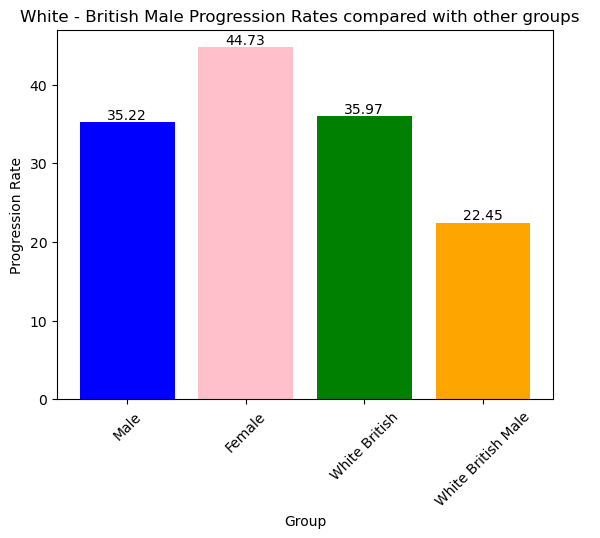

In [12]:
# Plotting
labels = ['Male', 'Female', 'White British', 'White British Male']
progression_rates = [male_progression_rate, female_progression_rate, white_british_progression_rate, white_british_male_progression_rate]

plt.bar(labels, progression_rates, color=['blue', 'pink', 'green', 'orange'])
plt.title('White - British Male Progression Rates compared with other groups  ')
plt.xlabel('Group')
plt.ylabel('Progression Rate')
# Annotate bars with amounts
for i, rate in enumerate(progression_rates):
    plt.text(i, rate, f"{rate:.2f}", ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### *As we can see above, WBM (22.45%) are almost 13% less likely to access to HE than the average Male (35.22%).* 

## 5. A level students received Centre Assessed Grades in 2019/20, with students more likely to achieve higher grades than in previous years. This led to more students being accepted to HE and in particular to high tariff HE which may explain the increased progression rates compared with last year.  

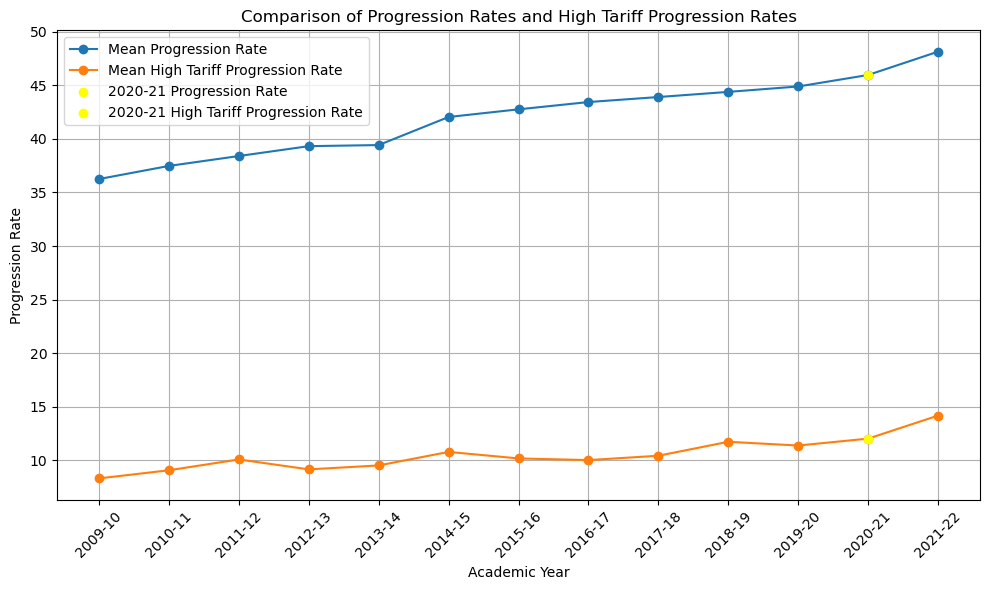

In [13]:
# Let's first filter data for the academic year 2020-21
data_2020_21 = df[df['time_period'] == 202021]

# Then calculate mean progression rates and high tariff progression rates for 2020-21
mean_progression_2020_21 = data_2020_21['progression_rate'].mean()
mean_high_tariff_progression_2020_21 = data_2020_21['high_tariff_progression_rate'].mean()

# We group data by time period and calculate mean progression rates and high tariff progression rates for each year
grouped_data = df.groupby('time_period').agg({
    'progression_rate': 'mean',
    'high_tariff_progression_rate': 'mean'
}).reset_index()

# We are going to format the time_period column to display academic years
grouped_data['time_period'] = grouped_data['time_period'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:]}")

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean progression rates
plt.plot(grouped_data['time_period'], grouped_data['progression_rate'], marker='o', label='Mean Progression Rate')

# Plot mean high tariff progression rates
plt.plot(grouped_data['time_period'], grouped_data['high_tariff_progression_rate'], marker='o', label='Mean High Tariff Progression Rate')

# To make it easier to read we highlight the academic year 2020-21
plt.scatter('2020-21', mean_progression_2020_21, color='yellow', label='2020-21 Progression Rate', zorder=5)
plt.scatter('2020-21', mean_high_tariff_progression_2020_21, color='yellow', label='2020-21 High Tariff Progression Rate', zorder=5)

plt.title('Comparison of Progression Rates and High Tariff Progression Rates')
plt.xlabel('Academic Year')
plt.ylabel('Progression Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### *We see that progression_rates experienced a noticeable increase during the academic years 2020-21 and especially 2021-22 when pupils received Centre Assessed Grades and A-level assessments were adapted due to Covid impacton pupils' progress, which might have supposed higher grades in geenral for students and, therefore, higher progression. However, we do not have enough data to clarify ths point, as we are missing important information such as pupils' grades during this academic years.*

## 6.Which ethnic group is more likely to progress to HE?

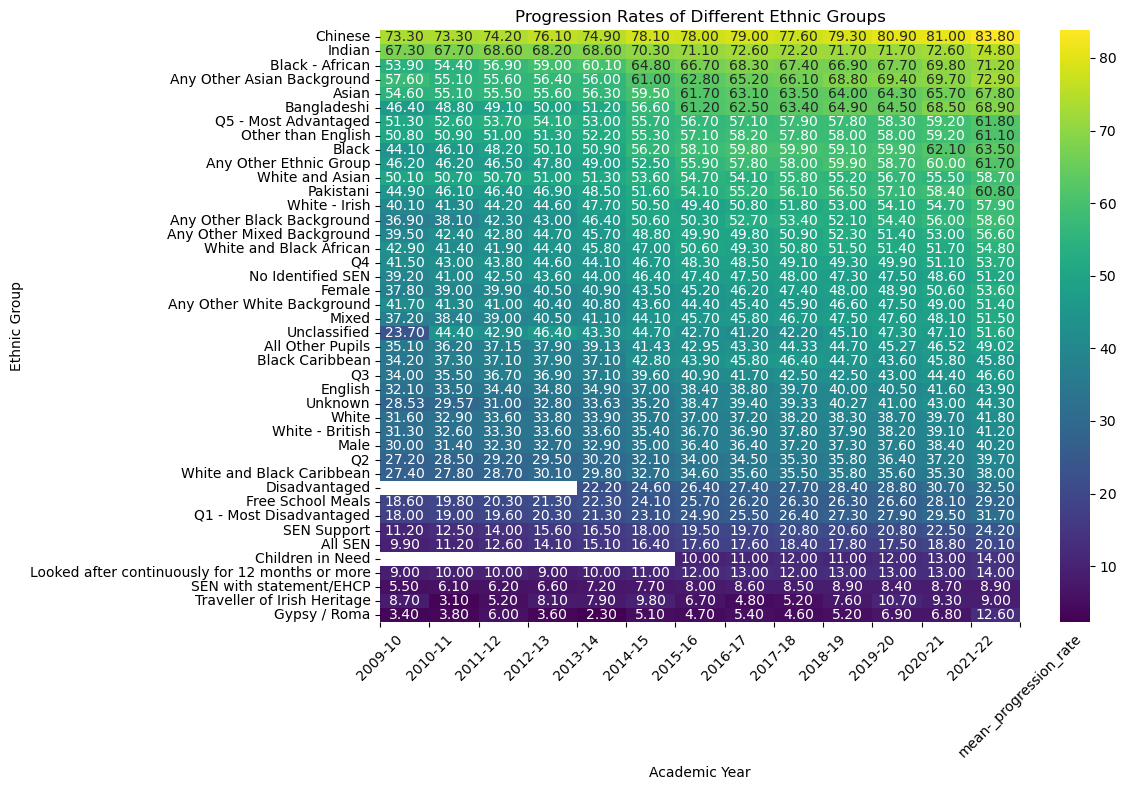

In [14]:
# We are going to pivot df to have ethnic groups as rows, time periods as columns, and progression rates as values
pivot_df = df.pivot_table(index='characteristic_detail', columns='time_period', values='progression_rate')

# We then calculate the mean progression rate for each ethnic group across all years
pivot_df['mean_progression_rate'] = pivot_df.mean(axis=1)

# We are going to sort the pivot table by the mean progression rates in descending order
pivot_df = pivot_df.sort_values(by='mean_progression_rate', ascending=False)

# Create a heatmap with an accessible palette 'viridis'.
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_df.drop(columns='mean_progression_rate'), cmap='viridis', cbar=True, annot=True, fmt=".2f")
plt.title('Progression Rates of Different Ethnic Groups')
plt.xlabel('Academic Year')
plt.ylabel('Ethnic Group')

# We format again the x-axis tick labels
time_periods = pivot_df.columns.astype(str).str[:4] + '-' + pivot_df.columns.astype(str).str[4:]
plt.xticks(ticks=range(len(time_periods)), labels=time_periods, rotation=45)

plt.tight_layout()
plt.show()

### *We can see in our heatmap that Chinese pupils with roughly 84 % chances are the most likely to progress to HE, followed by Indian, Black & African and Any Other Asian Background. On the other side of the equation we find Gipsy/roma, Traveller of Irish Heritage, SEN with statement/EHCP, Looked after and Children in Need.*

## 7. POLAR (Participation of Local Areas) Pupils in the most advantaged quintile were almost twice as likely to progress to HE by age 19 by 2021/22 as those from the most disadvantaged quintile.

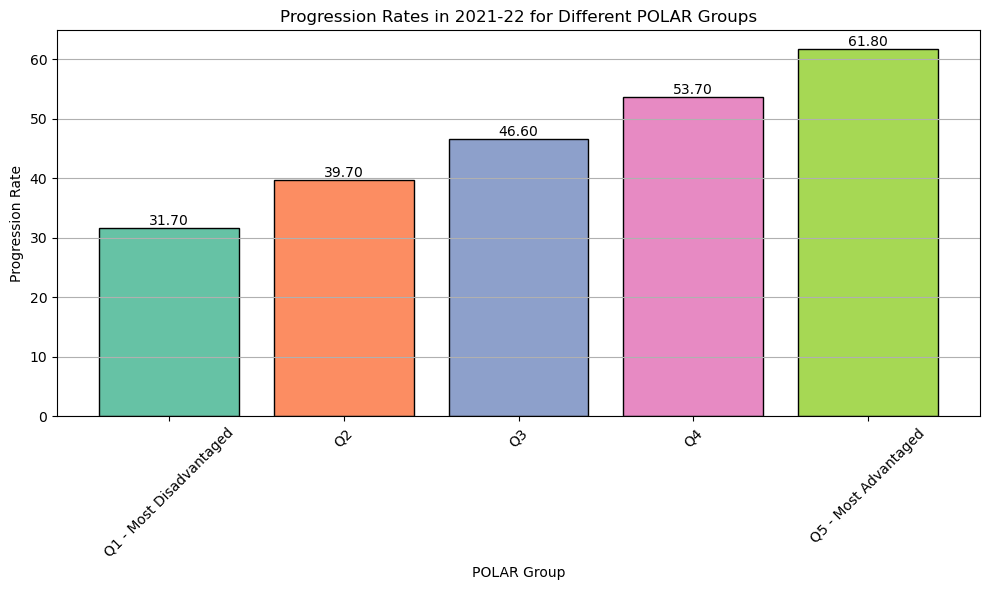

In [15]:
# Filter data for the year 2021-22 and specified POLAR groups
data_2021_22 = df[(df['time_period'] == 202122) & df['characteristic_detail'].isin(['Q1 - Most Disadvantaged', 'Q2', 'Q3', 'Q4', 'Q5 - Most Advantaged'])]

# Create a bar plot
# First we are going to define a color palette for the POLAR groups
colors = sns.color_palette('Set2', n_colors=len(data_2021_22['characteristic_detail']))

# Then we create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(data_2021_22['characteristic_detail'], data_2021_22['progression_rate'], color=colors, edgecolor='black')

# Finally we add progression rate amounts on the plot
for bar, value in zip(bars, data_2021_22['progression_rate']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom')

plt.title('Progression Rates in 2021-22 for Different POLAR Groups')
plt.xlabel('POLAR Group')
plt.ylabel('Progression Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### *In the plot we confirm our hypothesis. Pupils in the most advantaged quintile were almost twice as likely to progress to HE by age 19 by 2021/22 as those from the most disadvantaged quintile, at 61.8% compared to 31.7%.*

## 8. Standard Error of the Mean (SEM) of progression_rate and high_tariff_progression_rate

In [16]:
from scipy.stats import sem
# Calculate the standard error of the mean for progression_rate and high_tariff_progression_rate
sem_progression_rate = sem(df['progression_rate'])
sem_high_tariff_progression_rate = sem(df['high_tariff_progression_rate'])

print(f"The Standard Error of the Mean for Progression Rate is {sem_progression_rate:.6f}")
print(f"The Standard Error of the Mean for High Tariff Progression Rate is {sem_high_tariff_progression_rate:.6f}")


The Standard Error of the Mean for Progression Rate is 0.693416
The Standard Error of the Mean for High Tariff Progression Rate is 0.291352


## 9.Outlier Detection

In [17]:
#Let's define our function to detect outliers:

def find_outliers(df):
    q1 = df['progression_rate'].quantile(0.25)
    q3 = df['progression_rate'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    outliers_df = df[(df['progression_rate'] < lower) | (df['progression_rate'] > upper)]
    outliers = outliers_df['progression_rate'].tolist()
    characteristic_details = outliers_df['characteristic_detail'].tolist()
   #We want the characteristic_detail too 
    return list(zip(outliers, characteristic_details))

In [18]:
find_outliers(df)

[(3.4, 'Gypsy / Roma'),
 (3.1, 'Traveller of Irish Heritage'),
 (3.8, 'Gypsy / Roma'),
 (3.6, 'Gypsy / Roma'),
 (2.3, 'Gypsy / Roma'),
 (4.7, 'Gypsy / Roma'),
 (4.8, 'Traveller of Irish Heritage'),
 (4.6, 'Gypsy / Roma'),
 (83.8, 'Chinese'),
 (83.8, 'Chinese')]

In [19]:
#Let's do the same for our high_tariff_progression_rate column
def find_outliers2(df):
    q1 = df['high_tariff_progression_rate'].quantile(0.25)
    q3 = df['high_tariff_progression_rate'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    outliers_df = df[(df['high_tariff_progression_rate'] < lower) | (df['high_tariff_progression_rate'] > upper)]
    outliers = outliers_df['high_tariff_progression_rate'].tolist()
    characteristic_details = outliers_df['characteristic_detail'].tolist()
   #We want the characteristic_detail too 
    return list(zip(outliers, characteristic_details))

In [20]:
find_outliers2(df)

[(29.5, 'Chinese'),
 (29.5, 'Chinese'),
 (31.8, 'Chinese'),
 (31.8, 'Chinese'),
 (32.8, 'Chinese'),
 (32.8, 'Chinese'),
 (31.9, 'Chinese'),
 (31.9, 'Chinese'),
 (32.6, 'Chinese'),
 (32.6, 'Chinese'),
 (34.4, 'Chinese'),
 (34.4, 'Chinese'),
 (34.2, 'Chinese'),
 (34.2, 'Chinese'),
 (34.2, 'Chinese'),
 (34.2, 'Chinese'),
 (35.3, 'Chinese'),
 (35.3, 'Chinese'),
 (39.0, 'Chinese'),
 (39.0, 'Chinese'),
 (36.8, 'Chinese'),
 (36.8, 'Chinese'),
 (40.7, 'Chinese'),
 (40.7, 'Chinese'),
 (24.5, 'White - Irish'),
 (23.5, 'White and Asian'),
 (27.0, 'Indian'),
 (23.8, 'Any Other Asian Background'),
 (46.0, 'Chinese'),
 (24.4, 'Q5 - Most Advantaged'),
 (46.0, 'Chinese')]

### *We can see after identifying our outliers, that the inclusion of certain minorities due to their extraordinary low (Gipsy/Roma, Irish Traveller, etc.) and/or high values (Chinese, Any Other Asian Background, etc.) will have an impact if/when making a potential analysis of all our data. However, I believe these shouldn't be removed on this occasion, although we need to be aware of them in terms of the reliability of our analysis.* 

## 9.Correlation.

### We are going to see the correlation between the numeric variables.

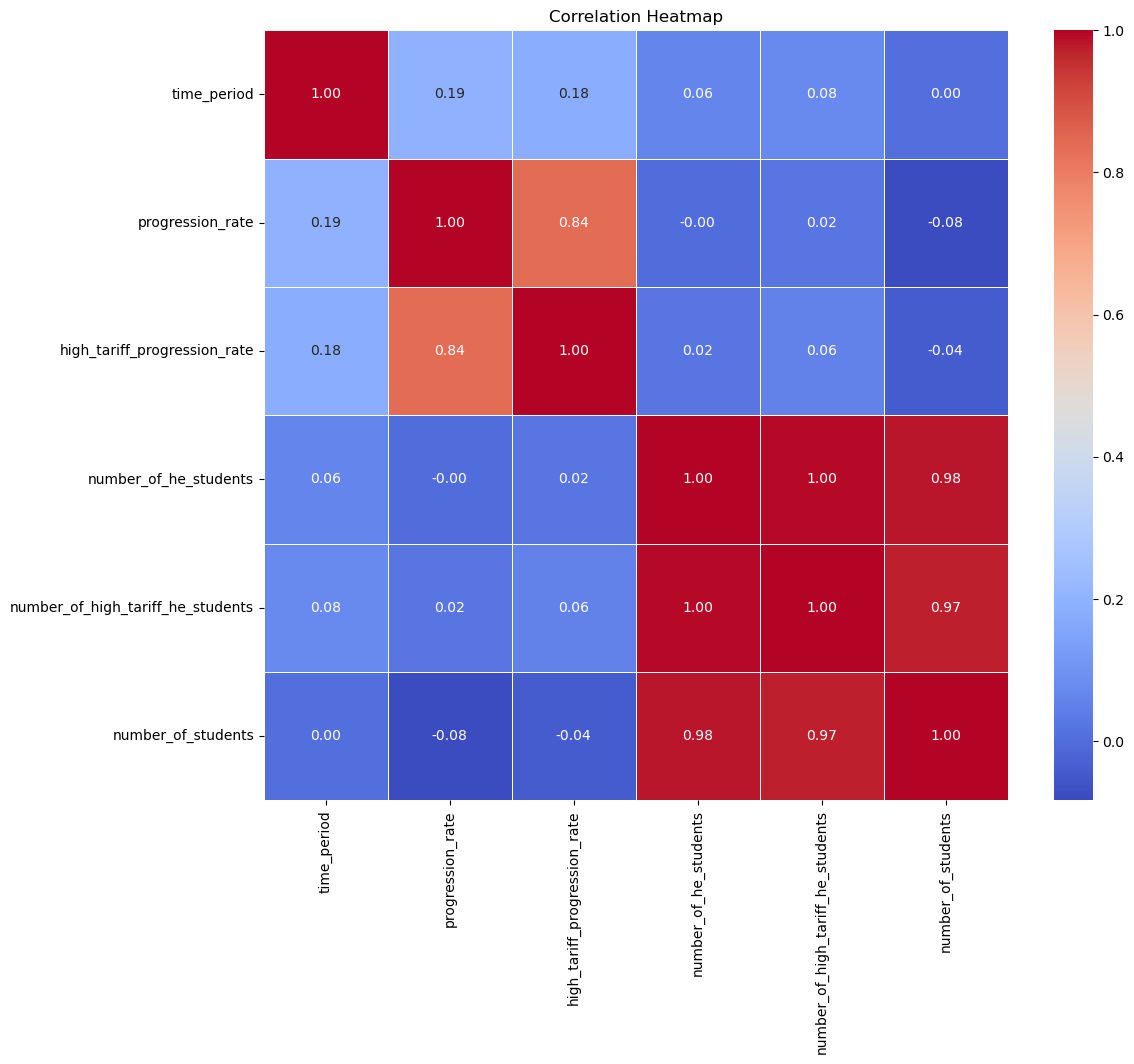

In [21]:

# Let's exclude non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### *We see that the number of students and the progression rates  have low correlation, which indicates weak or no linear association. This does not necessarily imply that the variables are unrelated or independent. Additional analysis and consideration of other factors may be needed to understand the relationship between variables fully. However, given that we are mainly concerned about Widening Participation, we are focusing on minorities rather than paying attention to total number of students.*

## 10. Combined characteristic details.

### *One of the main issues of our Dataset is that it does not seem to take intersectionality into account, which is not real, as lots of pupils might belong to more than one category. Thus, I wish to create a new DataFrame where each row represents every possible combination of characteristic_detail from the original DataFrame df, and the corresponding progression_rate for each combination.*

### *However, in column 1 we need to avoid combining 'characteristic_detail' (s) if/when in original df 'characteristic ' for item 1 and 2 is the same. e.g. 'Male' and 'Female' cannot be combined as 'characteristic' in both is 'gender'. This was quite problematic and difficult to get at this level, but after numerous attempts this was the solution that provided me wit the best results.*

In [155]:
# We group by unique_characteristic and unique_characteristic_details and calculate mean progression_rate
mean_progression_rates = df.groupby(['characteristic', 'characteristic_detail'])['progression_rate'].mean()

# Build dictionary
characteristic_progression_rates = {}
for (characteristic, detail), mean_rate in mean_progression_rates.items():
    if characteristic not in characteristic_progression_rates:
        characteristic_progression_rates[characteristic] = {}
    characteristic_progression_rates[characteristic][detail] = mean_rate

characteristic_progression_rates

{'Children in Need': {'All Other Pupils': 43.857142857142854,
  'Children in Need': 11.857142857142858},
 'Disadvantage': {'All Other Pupils': 46.81111111111111,
  'Disadvantaged': 27.633333333333333},
 'Ethnicity Major': {'Any Other Ethnic Group': 53.861538461538466,
  'Asian': 60.51538461538462,
  'Black': 55.23076923076923,
  'Chinese': 77.65384615384616,
  'Mixed': 44.0923076923077,
  'Unknown': 39.246153846153845,
  'White': 36.33846153846154},
 'Ethnicity Minor': {'Any Other Asian Background': 62.815384615384616,
  'Any Other Black Background': 48.83076923076923,
  'Any Other Ethnic Group': 53.861538461538466,
  'Any Other Mixed Background': 48.29230769230769,
  'Any Other White Background': 44.53846153846154,
  'Bangladeshi': 58.15384615384615,
  'Black - African': 63.62307692307692,
  'Black Caribbean': 41.723076923076924,
  'Chinese': 77.65384615384616,
  'Gypsy / Roma': 5.415384615384616,
  'Indian': 70.56923076923077,
  'Pakistani': 52.50769230769231,
  'Traveller of Irish H

In [156]:
# Let's generate all possible combinations of characteristic_details from different keys
combinations_list = []
for key1, key2 in combinations(characteristic_progression_rates.keys(), 2):
    for detail1 in characteristic_progression_rates[key1]:
        for detail2 in characteristic_progression_rates[key2]:
            combinations_list.append((key1, detail1, key2, detail2))

# Df from the combinations
combinations_df = pd.DataFrame(combinations_list, columns=['unique_characteristic_1', 'characteristic_detail_1', 'unique_characteristic_2', 'characteristic_detail_2'])

# Average progression_rate for each combination (perhaps a weighed average based on number of students would have been more 'accurate')
progression_rates = []
for idx, row in combinations_df.iterrows():
    detail1 = row['characteristic_detail_1']
    detail2 = row['characteristic_detail_2']
    rate1 = characteristic_progression_rates.get(row['unique_characteristic_1'], {}).get(detail1, 0)
    rate2 = characteristic_progression_rates.get(row['unique_characteristic_2'], {}).get(detail2, 0)
    avg_rate = (rate1 + rate2) / 2
    progression_rates.append(avg_rate)

# Wdd the average progression_rate column to combinations_df
combinations_df['combined_average_progression_rate'] = progression_rates

combinations_df


,unique_characteristic_1,characteristic_detail_1,unique_characteristic_2,characteristic_detail_2,combined_average_progression_rate
0,Children in Need,All Other Pupils,Disadvantage,All Other Pupils,45.334127
1,Children in Need,All Other Pupils,Disadvantage,Disadvantaged,35.745238
2,Children in Need,Children in Need,Disadvantage,All Other Pupils,29.334127
3,Children in Need,Children in Need,Disadvantage,Disadvantaged,19.745238
4,Children in Need,All Other Pupils,Ethnicity Major,Any Other Ethnic Group,48.859341
...,...,...,...,...,...
1001,SEN Major,All SEN,SEN Status,SEN Support,17.038462
1002,SEN Major,All SEN,SEN Status,SEN with statement/EHCP,11.784615
1003,SEN Major,No Identified SEN,SEN Status,No Identified SEN,45.707692
1004,SEN Major,No Identified SEN,SEN Status,SEN Support,31.926923


In [157]:
# We then define a custom function to combine characteristic details
def combine_details(row):
    if row['characteristic_detail_1'] != row['characteristic_detail_2']:
        return f"{row['characteristic_detail_1']} - {row['characteristic_detail_2']}"
    else:
        return row['characteristic_detail_1']

# We apply the custom function to create the 'combination' column
combinations_df['combination'] = combinations_df.apply(combine_details, axis=1)

# Reorder the columns to have 'combination' followed by 'average_progression_rate'
combinations_df = combinations_df[['unique_characteristic_1', 'characteristic_detail_1', 'unique_characteristic_2', 'characteristic_detail_2', 'combination', 'combined_average_progression_rate']]

combinations_df

,unique_characteristic_1,characteristic_detail_1,unique_characteristic_2,characteristic_detail_2,combination,combined_average_progression_rate
0,Children in Need,All Other Pupils,Disadvantage,All Other Pupils,All Other Pupils,45.334127
1,Children in Need,All Other Pupils,Disadvantage,Disadvantaged,All Other Pupils - Disadvantaged,35.745238
2,Children in Need,Children in Need,Disadvantage,All Other Pupils,Children in Need - All Other Pupils,29.334127
3,Children in Need,Children in Need,Disadvantage,Disadvantaged,Children in Need - Disadvantaged,19.745238
4,Children in Need,All Other Pupils,Ethnicity Major,Any Other Ethnic Group,All Other Pupils - Any Other Ethnic Group,48.859341
...,...,...,...,...,...,...
1001,SEN Major,All SEN,SEN Status,SEN Support,All SEN - SEN Support,17.038462
1002,SEN Major,All SEN,SEN Status,SEN with statement/EHCP,All SEN - SEN with statement/EHCP,11.784615
1003,SEN Major,No Identified SEN,SEN Status,No Identified SEN,No Identified SEN,45.707692
1004,SEN Major,No Identified SEN,SEN Status,SEN Support,No Identified SEN - SEN Support,31.926923


In [158]:
# New column 'combination' by concatenating 'characteristic_detail_1' and 'characteristic_detail_2'
combinations_df['combination'] = combinations_df.apply(lambda row: f"{row['characteristic_detail_1']} - {row['characteristic_detail_2']}" if row['characteristic_detail_1'] != row['characteristic_detail_2'] else row['characteristic_detail_1'], axis=1)

# Drop the 'characteristic_detail_1' and 'characteristic_detail_2' columns
combinations_df = combinations_df.drop(['characteristic_detail_1', 'characteristic_detail_2'], axis=1)

combinations_df


,unique_characteristic_1,unique_characteristic_2,combination,combined_average_progression_rate
0,Children in Need,Disadvantage,All Other Pupils,45.334127
1,Children in Need,Disadvantage,All Other Pupils - Disadvantaged,35.745238
2,Children in Need,Disadvantage,Children in Need - All Other Pupils,29.334127
3,Children in Need,Disadvantage,Children in Need - Disadvantaged,19.745238
4,Children in Need,Ethnicity Major,All Other Pupils - Any Other Ethnic Group,48.859341
...,...,...,...,...
1001,SEN Major,SEN Status,All SEN - SEN Support,17.038462
1002,SEN Major,SEN Status,All SEN - SEN with statement/EHCP,11.784615
1003,SEN Major,SEN Status,No Identified SEN,45.707692
1004,SEN Major,SEN Status,No Identified SEN - SEN Support,31.926923


In [159]:
# we drop rows where 'unique_characteristic_1' and 'unique_characteristic_2' are the same or contain the same words
combinations_df = combinations_df[~combinations_df.apply(lambda row: set(row['unique_characteristic_1'].split()) == set(row['unique_characteristic_2'].split()), axis=1)]

# We drop rows where the combination happened between 'Ethnicity Minor' with 'Ethnicity Major' and 'SEN Status' with 'SEN Major'
combinations_df = combinations_df[~((combinations_df['unique_characteristic_1'] == 'Ethnicity Minor') & (combinations_df['unique_characteristic_2'] == 'Ethnicity Major'))]
combinations_df = combinations_df[~((combinations_df['unique_characteristic_1'] == 'Ethnicity Major') & (combinations_df['unique_characteristic_2'] == 'Ethnicity Minor'))]
combinations_df = combinations_df[~((combinations_df['unique_characteristic_1'] == 'SEN Status') & (combinations_df['unique_characteristic_2'] == 'SEN Major'))]
combinations_df = combinations_df[~((combinations_df['unique_characteristic_1'] == 'SEN Major') & (combinations_df['unique_characteristic_2'] == 'SEN Status'))]

# We drop columns 'unique_characteristic_1' and 'unique_characteristic_2'
combinations_df.drop(['unique_characteristic_1', 'unique_characteristic_2'], axis=1, inplace=True)

# Reset the index
combinations_df.reset_index(drop=True, inplace=True)

combinations_df

,combination,combined_average_progression_rate
0,All Other Pupils,45.334127
1,All Other Pupils - Disadvantaged,35.745238
2,Children in Need - All Other Pupils,29.334127
3,Children in Need - Disadvantaged,19.745238
4,All Other Pupils - Any Other Ethnic Group,48.859341
...,...,...
862,Q5 - Most Advantaged - SEN Support,37.119231
863,Q5 - Most Advantaged - SEN with statement/EHCP,31.865385
864,Unknown - No Identified SEN,38.588462
865,Unknown - SEN Support,24.807692


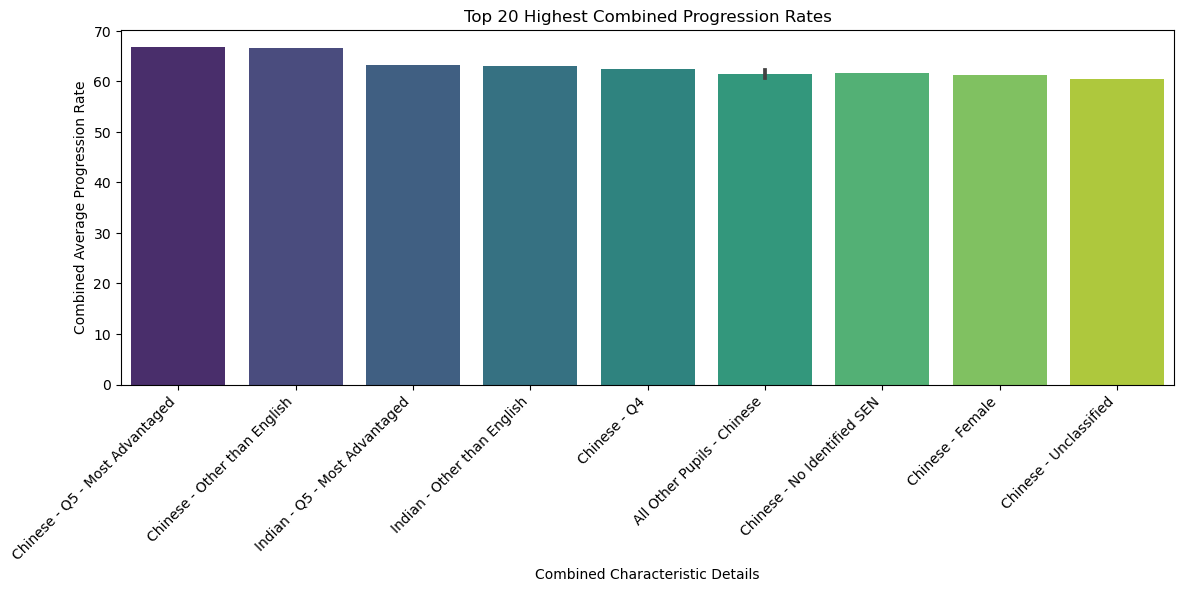

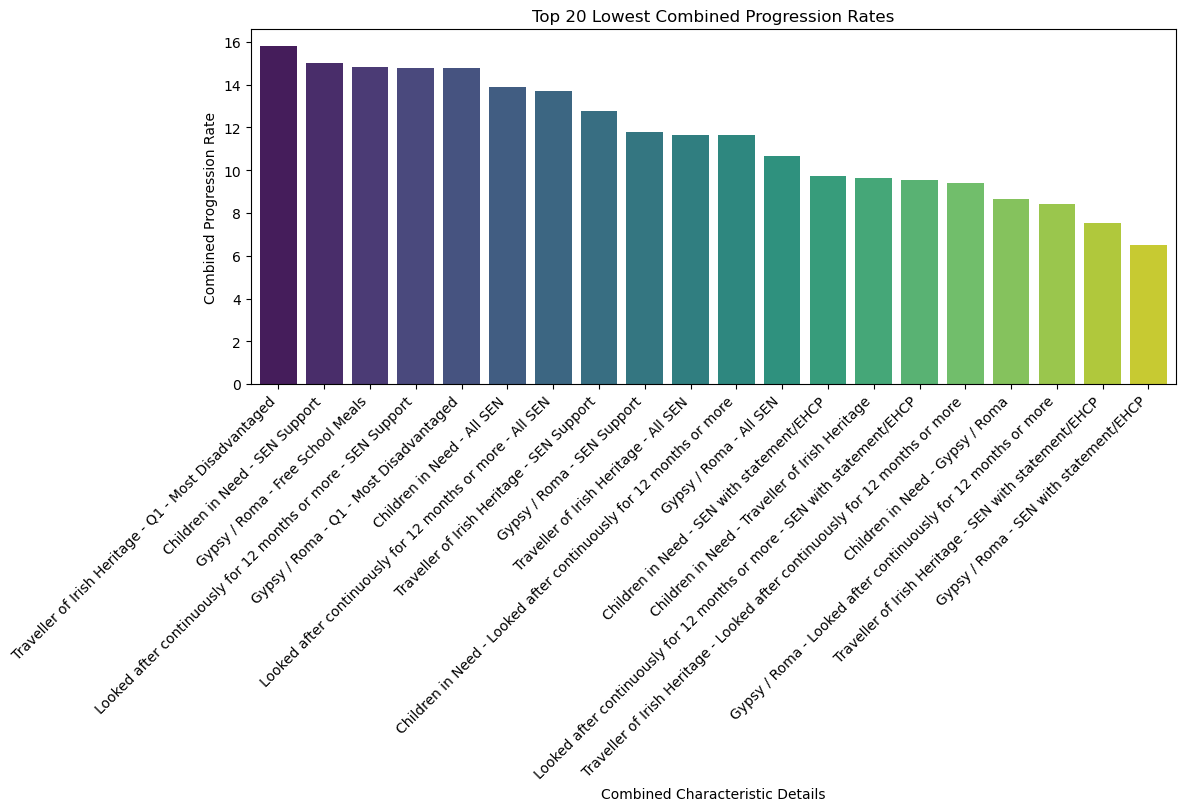

In [77]:
# Sort combinations_df by combined_progression_rate in descending order
combinations_df_sorted = combinations_df.sort_values(by='combined_average_progression_rate', ascending=False)

# Reset index to make 'combination' a regular column
combinations_df_sorted.reset_index(inplace=True)

# Get the top 20 highest and lowest combined_progression_rate values
top_20_highest = combinations_df_sorted.head(20)
top_20_lowest = combinations_df_sorted.tail(20)

# Plot comparing the 20 highest combined_progression_rates
plt.figure(figsize=(12, 6))
sns.barplot(x='combination', y='combined_average_progression_rate', data=top_20_highest, palette='viridis')
plt.title('Top 20 Highest Combined Progression Rates')
plt.xlabel('Combined Characteristic Details')
plt.ylabel('Combined Average Progression Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels at 45 degrees for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust bottom margin to fit everything
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin
plt.margins(x=0.01)  # Adjust margins for better spacing
plt.show()

# Plot comparing the 20 lowest combined_progression_rates
plt.figure(figsize=(12, 6))
sns.barplot(x='combination', y='combined_average_progression_rate', data=top_20_lowest, palette='viridis')
plt.title('Top 20 Lowest Combined Progression Rates')
plt.xlabel('Combined Characteristic Details')
plt.ylabel('Combined Progression Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels at 45 degrees for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust bottom margin to fit everything
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin
plt.margins(x=0.01)  # Adjust margins for better spacing
plt.show()

### *We can see that highest combined progression rates are, as expected, the combinations of those groups which highest progression rates individually. However, due to the fact that we decided to use the average to calculate the combined rate, the result is not always the most accurate. For example, if Chinese pupils on thir own have a progression_rate of roughly 83%, in case of belonging to POLAR 5-Most Advantaged group too, the result would probably be higher than 83% rather than the average between both groups. This shows our suspicions that the Dataset is not the best in terms of intersectionality, i.e. if we wish to work with groups of pupils that belong to different minorities. For these purposes, we would need a Dataset with a representative sample of pupils of each group.*

## 11. Trends and Predictions for 2025 (?)

In [111]:
# Convert 'time_period' column to string data type
df['time_period'] = df['time_period'].astype(str)

# Filter periods since '201819' onwards
recentyears_df = df[df['time_period'] >= '201819']

# Create pivot table to get progression_rate by characteristic_detail for each time_period
progression_by_characteristic_detail_by_year = pd.pivot_table(recentyears_df, 
                                                             index='characteristic_detail', 
                                                             columns='time_period', 
                                                             values='progression_rate')

# Reset index to make characteristic_detail a column instead of index
progression_by_characteristic_detail_by_year.reset_index(inplace=True)

# Set 'characteristic_detail' column as index
progression_by_characteristic_detail_by_year.set_index('characteristic_detail', inplace=True)

# Rename the index axis name
progression_by_characteristic_detail_by_year.index.name = None

progression_by_characteristic_detail_by_year

time_period,201819,201920,202021,202122
All Other Pupils,44.700000,45.275,46.525,49.025
All SEN,17.800000,17.500,18.800,20.100
Any Other Asian Background,68.800000,69.400,69.700,72.900
Any Other Black Background,52.100000,54.400,56.000,58.600
Any Other Ethnic Group,59.900000,58.700,60.000,61.700
Any Other Mixed Background,52.300000,51.400,53.000,56.600
Any Other White Background,46.600000,47.500,49.000,51.400
Asian,64.000000,64.300,65.700,67.800
Bangladeshi,64.900000,64.500,68.500,68.900
Black,59.100000,59.900,62.100,63.500


In [131]:
# time_period back into integer
df['time_period'] = df['time_period'].astype(int)



In [132]:
# Check unique
time_periods_unique = df['time_period'].unique()

# Print the unique values
print(time_periods_unique)

[200910 201011 201112 201213 201314 201415 201516 201617 201718 201819
 201920 202021 202122]


In [140]:
#Trying Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def forecast_progression(df):
    forecasts = []

    # Let's iterate over each characteristic_detail
    for characteristic_detail, data in df.iterrows():
        # Initialise an empty list for storing progression rates
        progression_rates = []

        # Historical progression rates and convert to float
        for value in data.values:
            try:
                # Attempt to convert the value to float
                rate = float(value)
                progression_rates.append(rate)
            except (ValueError, TypeError):
                # Skip over non-numeric values
                continue

        # If  no valid progression rates, skip row
        if not progression_rates:
            continue

        # Fit the Exponential Smoothing model
        model = ExponentialSmoothing(progression_rates)
        fitted_model = model.fit()

        # Forecast the progression rate for the year 2025
        forecast = fitted_model.forecast(steps=1)

        # Append the forecast to the list
        forecasts.append(forecast[0])

    # Add the forecasted progression rates to the DataFrame
    df['forecast_2025'] = forecasts

    return df

# Perform the forecast for the DataFrame progression_by_characteristic_detail_by_year
forecasted_df = forecast_progression(progression_by_characteristic_detail_by_year)

forecasted_df.drop(columns=['forecast_202425'], inplace=True) #drop column added by mistake


# Print the DataFrame with the forecast for 2025
forecasted_df

time_period,201819,201920,202021,202122,forecast_2025
All Other Pupils,44.700000,45.275,46.525,49.025,49.025000
All SEN,17.800000,17.500,18.800,20.100,20.100000
Any Other Asian Background,68.800000,69.400,69.700,72.900,72.900000
Any Other Black Background,52.100000,54.400,56.000,58.600,58.600000
Any Other Ethnic Group,59.900000,58.700,60.000,61.700,60.075000
Any Other Mixed Background,52.300000,51.400,53.000,56.600,56.600000
Any Other White Background,46.600000,47.500,49.000,51.400,51.400000
Asian,64.000000,64.300,65.700,67.800,67.800000
Bangladeshi,64.900000,64.500,68.500,68.900,68.900000
Black,59.100000,59.900,62.100,63.500,63.500000


### *I gave it a go at trying to forecast the progression_rate(s) for 2025. This was quite tricky and probably 'out of my league' at the moment. At the end I made it work with some research, but the forecasting model did not capture significant changes or trends in the data, resulting in a forecast that closely resembles the last observed value, which prbably means it didn't work very well.* 

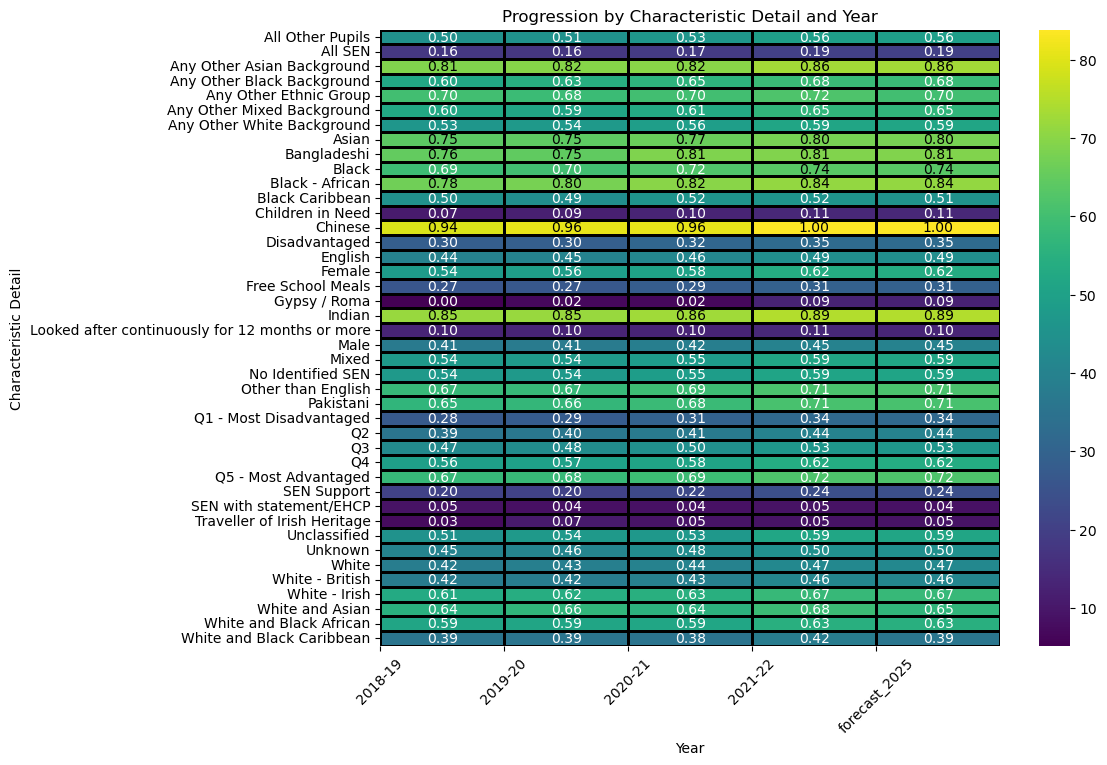

In [154]:

cmap = 'viridis'

# Create the heatmap with boxes around each cell
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(progression_by_characteristic_detail_by_year, cmap=cmap, linecolor='black', linewidths=1)

# Customize x-axis tick labels to display years in the format "2019-20"
num_years = len(progression_by_characteristic_detail_by_year.columns)
plt.xticks(range(num_years), [f'{year[:4]}-{year[4:]}' if year != 'forecast_2025' else year for year in progression_by_characteristic_detail_by_year.columns], rotation=45)

# Anotated values in accordance with colour palette

# Get the colour values from the colormap
colors = sns.color_palette(cmap, n_colors=256)

# Normalise progression rates to range [0, 1]
min_value = progression_by_characteristic_detail_by_year.min().min()
max_value = progression_by_characteristic_detail_by_year.max().max()
progression_by_characteristic_detail_by_year_normalized = (progression_by_characteristic_detail_by_year - min_value) / (max_value - min_value)

# Annotate the progression rates on the heatmap
for i in range(len(progression_by_characteristic_detail_by_year)):
    for j in range(len(progression_by_characteristic_detail_by_year.columns)):
        cell_value = progression_by_characteristic_detail_by_year_normalized.iloc[i, j]
        # Convert value to colormap index
        color_index = int(cell_value * (len(colors) - 1))
        # Determine text color based on brightness of the colormap
        brightness = np.mean(colors[color_index])
        text_color = 'black' if brightness > 0.5 else 'white'
        plt.text(j + 0.5, i + 0.5, f'{cell_value:.2f}', ha='center', va='center', color=text_color)

plt.title('Progression by Characteristic Detail and Year')
plt.xlabel('Year')
plt.ylabel('Characteristic Detail')
plt.show()


# Conclusions

## *This project has allowed me to put into practice a high deal of the skills acquired during the Bootcamp and applying them to HE data, which is my current field of specialism. While the results themselves have not revealed anything new, as my purpose was to 'validate' DfE's official figures, the process of writing the correct code, and above all debugging and looking at what I got wrong to get the right output have definitely stretched myself, deepened my comprehension of the different tools and enhanced my Data Analysis skillset in general.* 

## *As per the Dataset itself, under my personal perspective, while these figures could prove to be really useful in terms of identifying the general numbers and rates for each individual group of pupils, it clearly does not take into account intersectionality and obviously UK pupils (and worldwide) are a diverse population where a high percentage of students would match several of these categories. As such, we can effectively compare subsets of main characteristic(s) - characteristic_details - among themselves, e.g. FSM v. non-FSM, but cannot provide accurate and realistic measures if we try to look into combined characteristic_details. For example, we could not answer the question: what progression_rate would have a Black Caribben girl POLAR2 with SEN/EHCP ?* 

## *In terms of the results, as to the Academic Year 2021-22, the overall progression rates into HE seemed to follow an increasing fashion. However, this data does not really take into account that Covid19, lockdown and Centre Assessment Grades had a considerable impact on access to HE, giving the opportunity to more pupils to access HE. And aspointed out by DfE, minorities such as Gipsy/Roma, IrishTravellers, etc. might be outliers due to the inconsistency and the reduced and volatile number of pupils.* 

## *The Government (House of Commons Library Briefing, 24 January 2018) appears to agree on the fact that while progress overall is somewhat improving for most groups, this progress is 'slow', In their view, the focus on Widening Participation Activities should be on impact rather than expenditure, which might be the case for Outreach activities taking into account a tight budget, however the government should do well remembering that to level the field among different groups of students, the economic resources of each family play a paramount role, and in this case bursaries and other financial helps are a must.*